## Goal

Create a machine learning algorithm to predict if the customer will buy again or not.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 

import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
col_name = ['id', 'book_length', 'avg_book_length', 'price_overall', 'price_avg', 'review', 'review_out_of_10', 
     'total_minutes_listened', 'completion', 'support_request', 'last_interaction_minus_purchase_date', 'target']

In [3]:
data = pd.read_csv('data/Audiobooks_data.csv', names=col_name)
data.head()

,id,book_length,avg_book_length,price_overall,price_avg,review,review_out_of_10,total_minutes_listened,completion,support_request,last_interaction_minus_purchase_date,target
0,873,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


In [4]:
data.isnull().sum()

id                                      0
book_length                             0
avg_book_length                         0
price_overall                           0
price_avg                               0
review                                  0
review_out_of_10                        0
total_minutes_listened                  0
completion                              0
support_request                         0
last_interaction_minus_purchase_date    0
target                                  0
dtype: int64

 So data has no missing values

In [5]:
total_data = len(data)
(data['target'].value_counts()/total_data)*100

0    84.116728
1    15.883272
Name: target, dtype: float64

In [6]:
print('total data-->' , total_data)

total data--> 14084


So we have imbalance data 

/opt/anaconda3/envs/py3-tf2/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


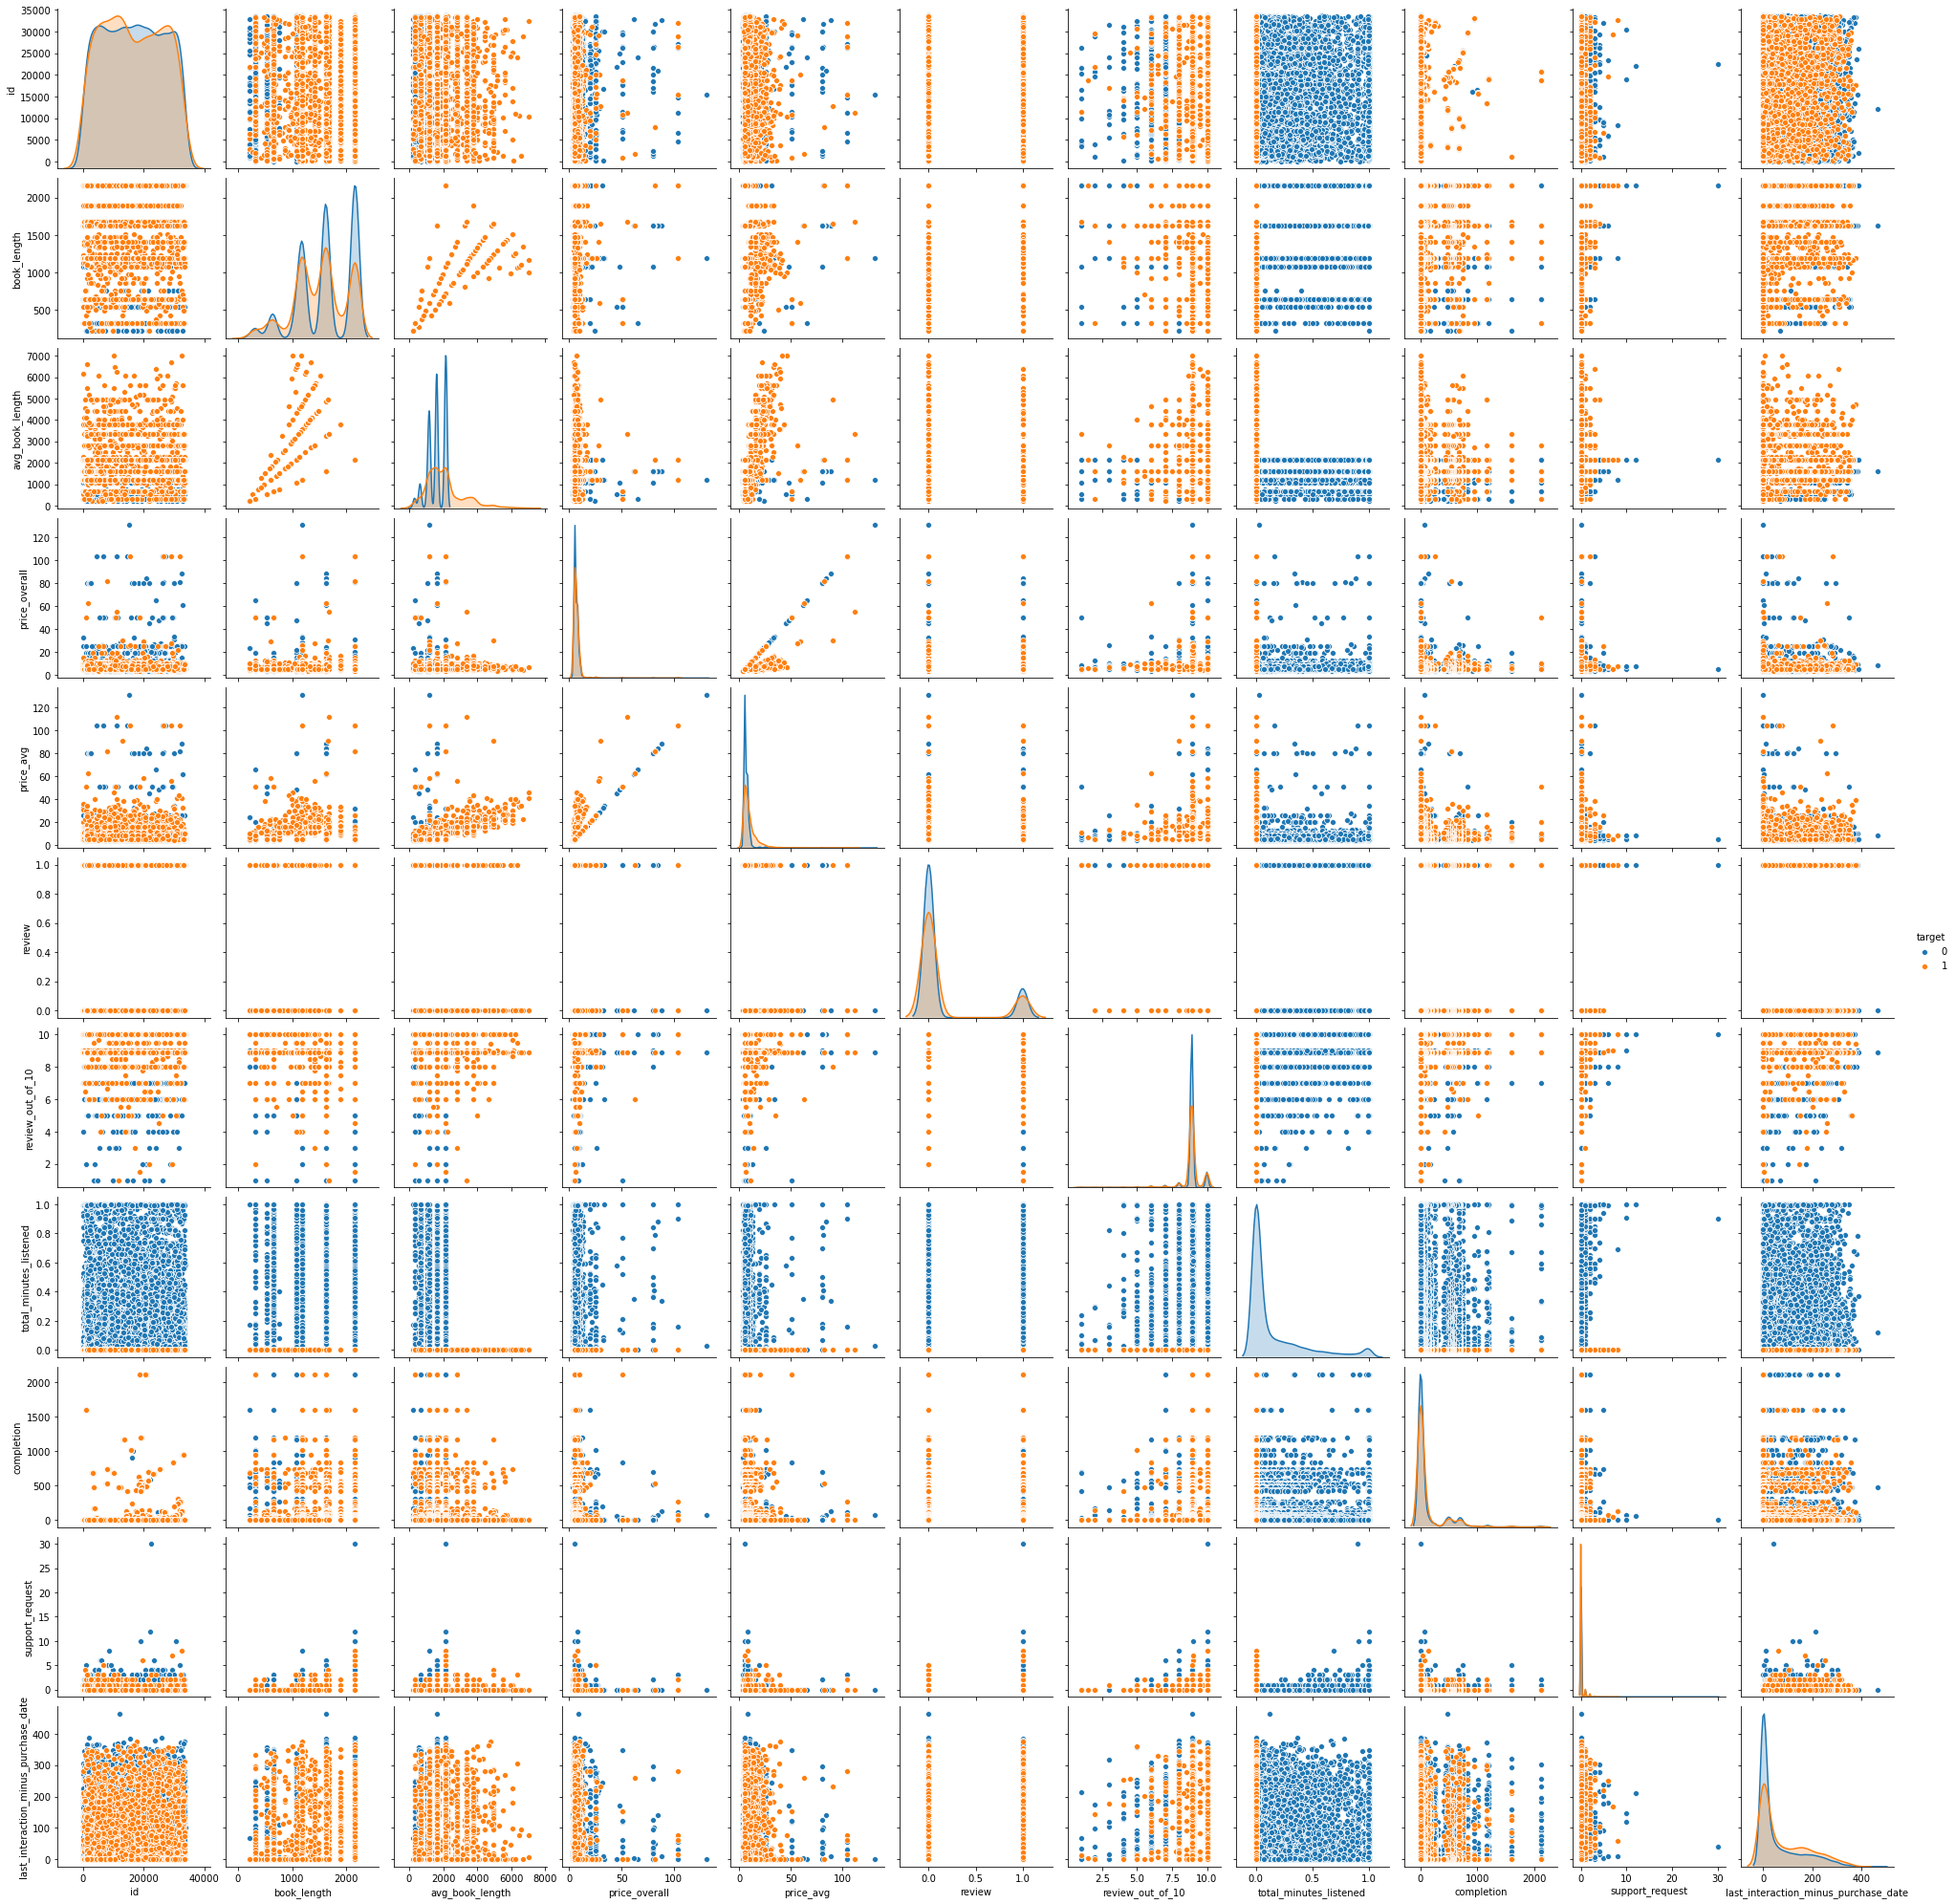

In [7]:
sns.pairplot(data, hue='target')
plt.show()

<AxesSubplot:>

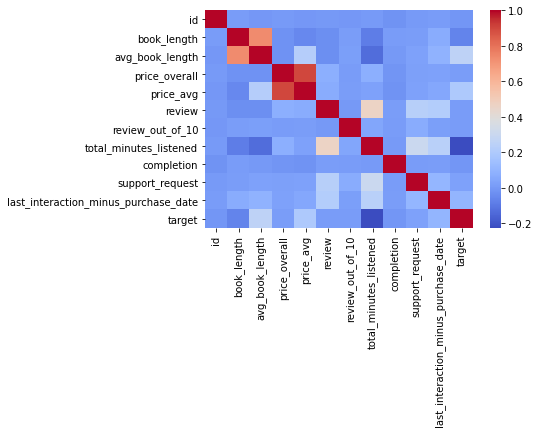

In [8]:
sns.heatmap(data.corr(), cmap='coolwarm')

Correlated columns:
- book_length and avg_book_length
- price_overall and price_avg

## Preprocess data
- balance dataset
- train/test/validation split 
- convert to .npz file

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X = data.iloc[ : ,1:len(col_name)-1]
y = data['target']
X.shape, y.shape

((14084, 10), (14084,))

### Balanace Dataset

In [11]:
total_data

14084

In [12]:
ones_target = np.sum(y)

In [13]:
y.value_counts()

0    11847
1     2237
Name: target, dtype: int64

In [14]:
zeros_target = 0 
to_remove_indices = []

for i in range(total_data):
    if y[i] == 0:
        zeros_target += 1
        if ones_target < zeros_target:
            to_remove_indices.append(i)
        

In [15]:
y = y.drop(to_remove_indices, axis=0)
X = X.drop(to_remove_indices, axis=0)

X.shape, y.shape

((4474, 10), (4474,))

### Standardize input

In [16]:
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

### Shuffle Data

In [17]:
indices = np.arange(scaled_X.shape[0])
np.random.shuffle(indices)

In [18]:
shuffled_X = scaled_X[indices]
shuffled_y = y[indices]

In [19]:
shuffled_X.shape, shuffled_y.shape

((4474, 10), (4474,))

### Split the data

In [20]:
total_samples = shuffled_X.shape[0]

train_size = int(total_samples *0.8)
test_size = int(total_samples * 0.1)
val_size = total_samples - train_size - test_size

train_data = shuffled_X[0: train_size]
train_targets = shuffled_y[0 : train_size]

val_data = shuffled_X[train_size : train_size+val_size]
val_targets = shuffled_y[train_size : train_size+val_size]

test_data = shuffled_X[train_size+val_size : ]
test_targets = shuffled_y[train_size+val_size : ]

train_data.shape, val_data.shape, test_data.shape

((3579, 10), (448, 10), (447, 10))

In [21]:
np.sum(train_targets), np.sum(val_targets), np.sum(test_targets)

(1759, 248, 230)

### save as .npz

In [22]:
np.savez('data/audio_book_train', inputs = train_data, targets = train_targets)
np.savez('data/audio_book_validation', inputs = val_data, targets = val_targets)
np.savez('data/audio_book_test', inputs = test_data, targets = test_targets)